In [2]:
%run ../../../common_functions/import_all.py

from common_functions.setup_notebook import set_css_style, setup_matplotlib, config_ipython

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

from common_functions.kmeans_helpers import (retrieve_cluster_points, 
                                             compute_wcss, 
                                             compute_gap_statistic, 
                                             evaluate_gap_statistic_best_k)

dataset = '../../datasets/oldfaithful.txt'

config_ipython()
setup_matplotlib()
set_css_style()

# k-means: trying it!

### Let's use the "old faithful" dataset

We will use the Old Faithful classic dataset, a copy of which is available in this repo under folder `datasets/` for convenience. 

In [2]:
# Let's read the Old Faithful dataset into a Pandas Dataframe, choosing the columns

data = pd.read_csv(dataset, delimiter=' ')[['eruptions', 'waiting']]

data.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


### Scale the data so that each column is in the same scale

In [3]:
scaled_data = scale(data)

### First, see how it looks like

It looks that 2 groups are naturally emerging from the data.

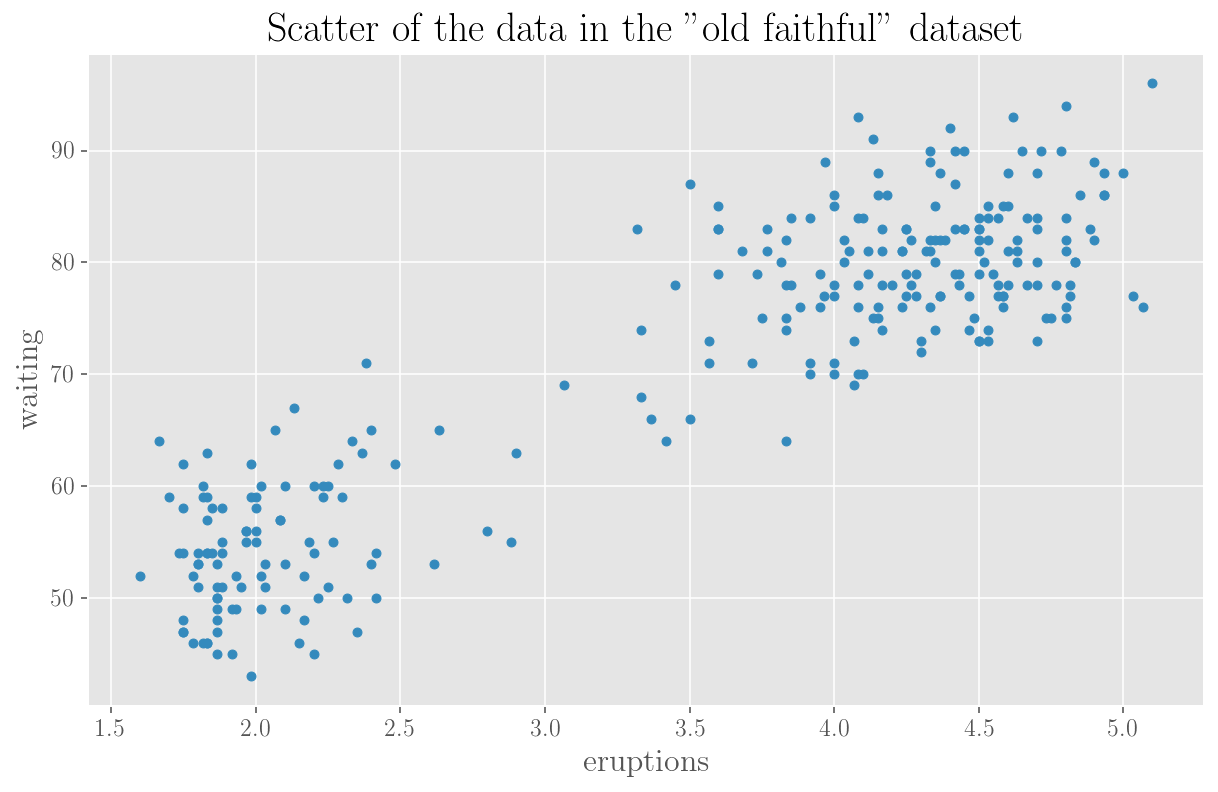

In [4]:
data.plot.scatter('eruptions', 'waiting')
plt.title('Scatter of the data in the "old faithful" dataset')
plt.show();

### What does the rule of thumb say?

In [5]:
thumb_k = np.sqrt(data.shape[0]/2)
print(' * Rule of thumb asserts optimal k =', round(thumb_k, 2))

 * Rule of thumb asserts optimal k = 11.66


### Using the elbow method

You'll see the elbow seems to appear quite soon.

k =  1
k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8
k =  9
k =  10
k =  11
k =  12
k =  13
k =  14
k =  15
k =  16
k =  17
k =  18
k =  19
k =  20


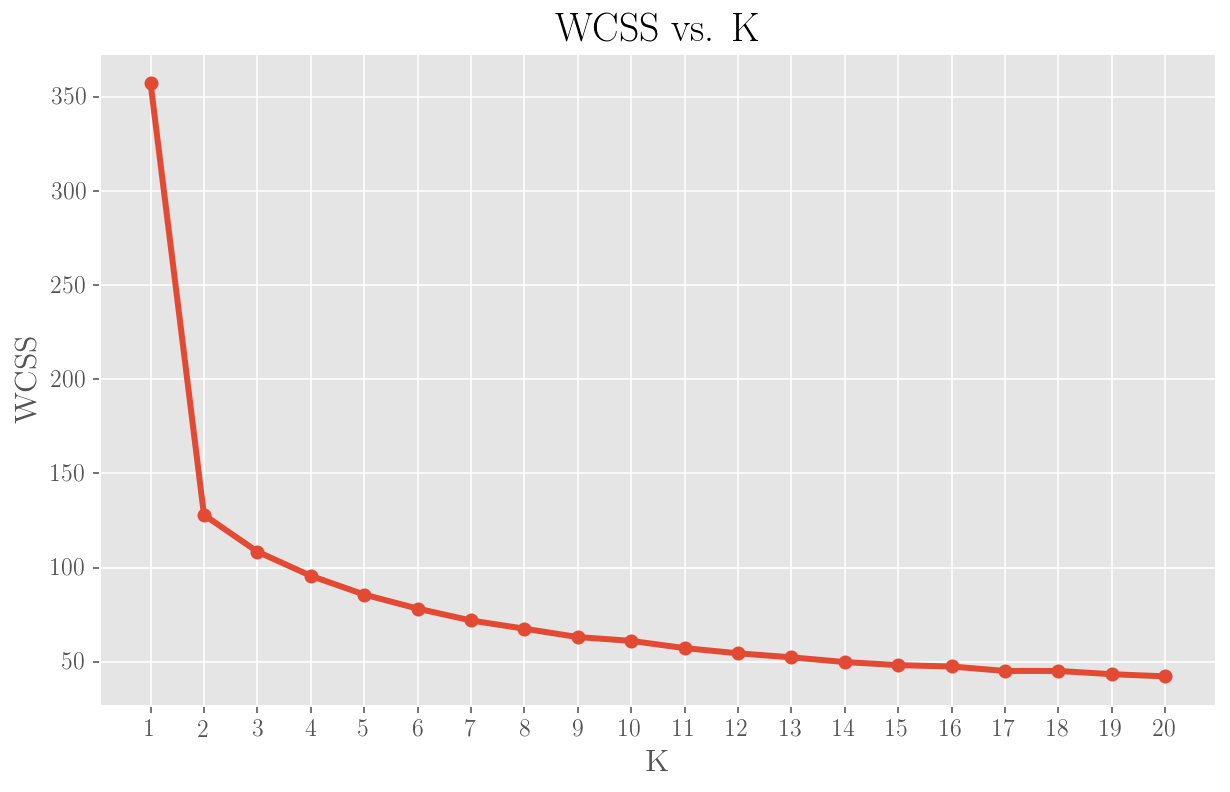

In [6]:
k_range = range(1, 21)            # range of K (decide arbitrarily how many Ks to test)
inertia_k = dict()                # inertia for each k
wcss_k = dict()                   # WCSS for each k
p_k = dict()                      # percentage of variance explained for each k

# Loop over the value of K
for k in k_range:
    print('k = ', k)
    
    # Fit the model
    fit = KMeans(n_clusters=k).fit(scaled_data)

    # Retrieve centroids for fitted model
    # A centroid is the cluster center, given as the vector of coordinates over the n_features dimensions
    # So there will be K number of n_features-dimensional centroids
    centroids = fit.cluster_centers_
    
    # Retrieve cluster labels for fitted model
    labels = fit.labels_

    # Retrieve the inertia of the fitted model
    inertia_k[k] = fit.inertia_
    
    # Compute the WCSS of the fitted model
    wcss_k[k] = compute_wcss(centroids, labels, scaled_data)
    
plt.title('WCSS vs. K')
plt.plot(k_range, list(wcss_k.values()), marker='o')
plt.xlabel('K')
plt.xticks(k_range)
plt.ylabel('WCSS')
plt.savefig('elbow.png', dpi=200)
plt.show();

### Run a clustering

In [7]:
k = 5                          # choose K

fit = KMeans(n_clusters=k).fit(scaled_data)
centroids = fit.cluster_centers_
labels = fit.labels_

labels

array([3, 2, 3, 0, 4, 0, 4, 4, 2, 4, 2, 4, 1, 2, 4, 2, 0, 4, 2, 1, 2, 2,
       3, 3, 1, 3, 2, 3, 3, 1, 1, 1, 3, 1, 3, 2, 2, 1, 0, 4, 1, 0, 4, 0,
       1, 3, 3, 2, 1, 0, 1, 4, 2, 1, 2, 4, 3, 0, 1, 1, 0, 4, 2, 1, 0, 4,
       1, 1, 0, 1, 1, 0, 1, 3, 0, 1, 0, 1, 3, 3, 3, 1, 3, 0, 3, 4, 3, 1,
       2, 4, 0, 4, 2, 1, 0, 1, 4, 3, 2, 1, 0, 4, 2, 4, 1, 2, 4, 2, 4, 3,
       1, 0, 4, 1, 0, 1, 2, 4, 0, 4, 2, 3, 1, 0, 4, 3, 2, 1, 2, 4, 2, 4,
       0, 4, 2, 1, 2, 4, 2, 3, 1, 0, 1, 1, 1, 0, 1, 2, 4, 2, 1, 3, 0, 1,
       3, 3, 1, 4, 2, 4, 2, 4, 0, 3, 3, 1, 0, 4, 2, 4, 2, 0, 1, 3, 1, 1,
       1, 2, 4, 3, 2, 1, 4, 3, 2, 1, 4, 2, 4, 2, 1, 0, 1, 4, 3, 1, 4, 1,
       2, 1, 0, 1, 4, 2, 1, 2, 1, 4, 2, 4, 0, 1, 2, 3, 3, 1, 2, 4, 2, 1,
       2, 1, 2, 1, 3, 1, 1, 1, 3, 1, 3, 2, 4, 2, 4, 2, 2, 1, 3, 0, 3, 2,
       4, 0, 4, 3, 0, 1, 0, 1, 2, 4, 3, 1, 4, 3, 3, 4, 0, 1, 1, 4, 0, 4,
       2, 0, 1, 1, 2, 4, 2, 1], dtype=int32)

### Compute the gap statistic

Note that this takes a bit to run.

In [8]:
k_gap = {}
for k in k_range:
    gap = compute_gap_statistic(scaled_data, k, scale_data=False)
    k_gap[k] = gap 
    
k_gapdiff = {}
for k in range(min(k_range), max(k_range)-1):
    k_gapdiff[k] = k_gap[k][0] - k_gap[k+1][0] - k_gap[k + 1][2]
        
'The best k according to the gap statistic is: ', evaluate_gap_statistic_best_k(scaled_data)

('The best k according to the gap statistic is: ', 2)

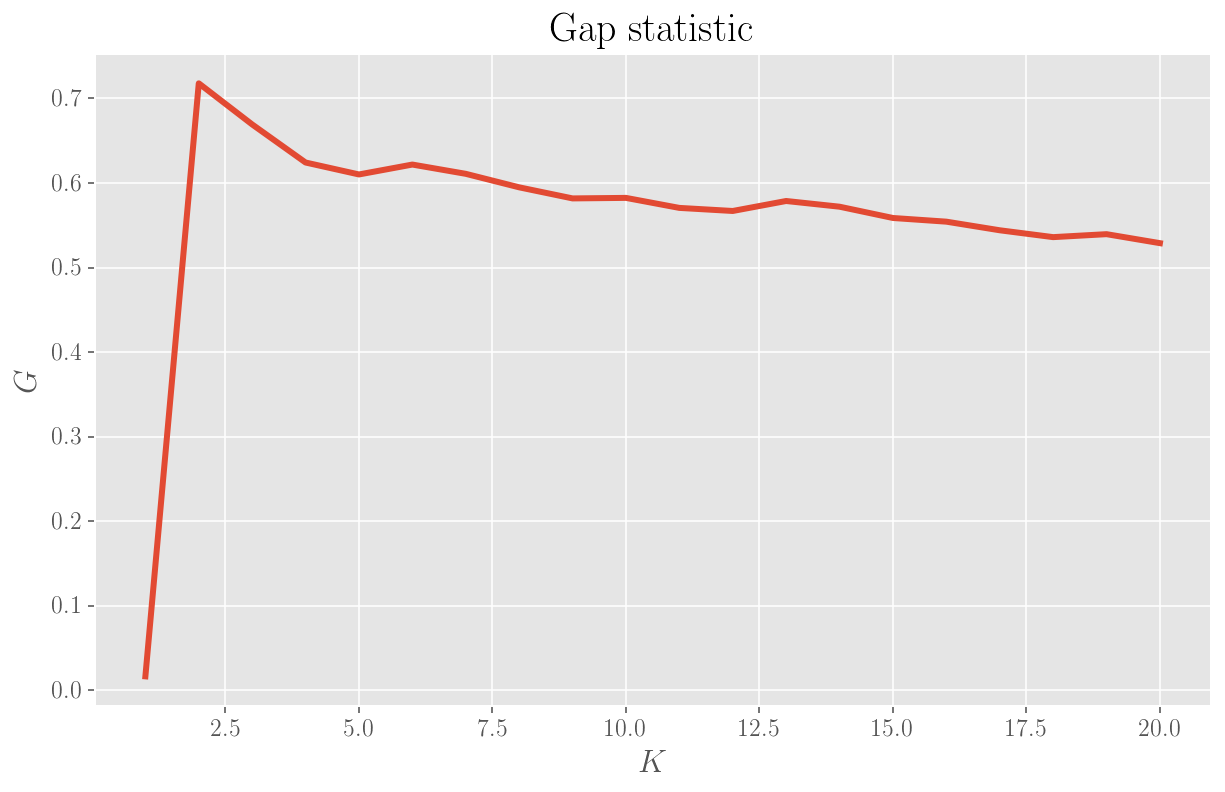

In [9]:
plt.plot(list(k_gap.keys()), [value[0] for value in k_gap.values()])
plt.title('Gap statistic')
plt.ylabel('$G$')
plt.xlabel('$K$')
#plt.grid()
plt.savefig('gap.png', dpi=200)
plt.show();

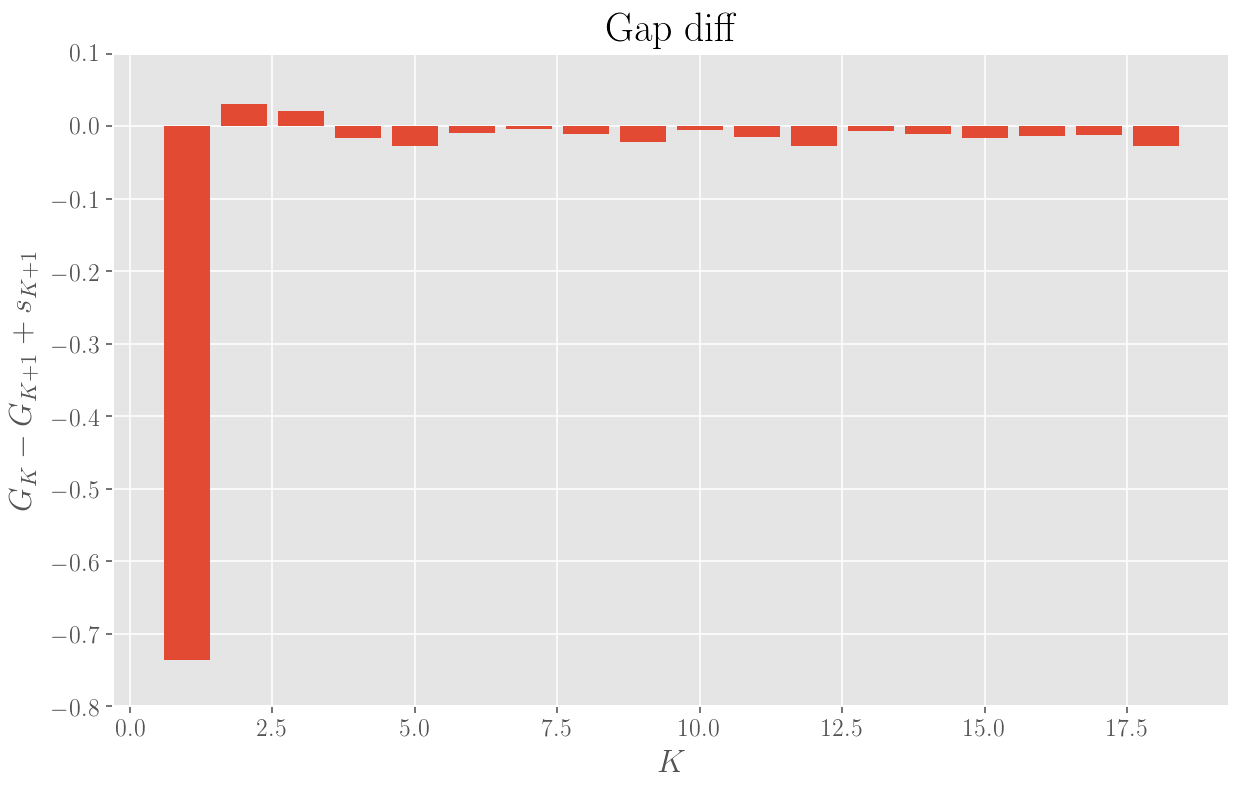

In [11]:
plt.bar(list(k_gapdiff.keys()), k_gapdiff.values())
plt.title('Gap diff')
plt.ylabel('$G_K - G_{K+1} + s_{K+1}$')
plt.xlabel('$K$')
plt.ylim(-0.8, 0.1)
plt.savefig('gapdiff.png', dpi=200)
plt.show();

### Scatter plot of two given features with the respective cluster colour and centroid

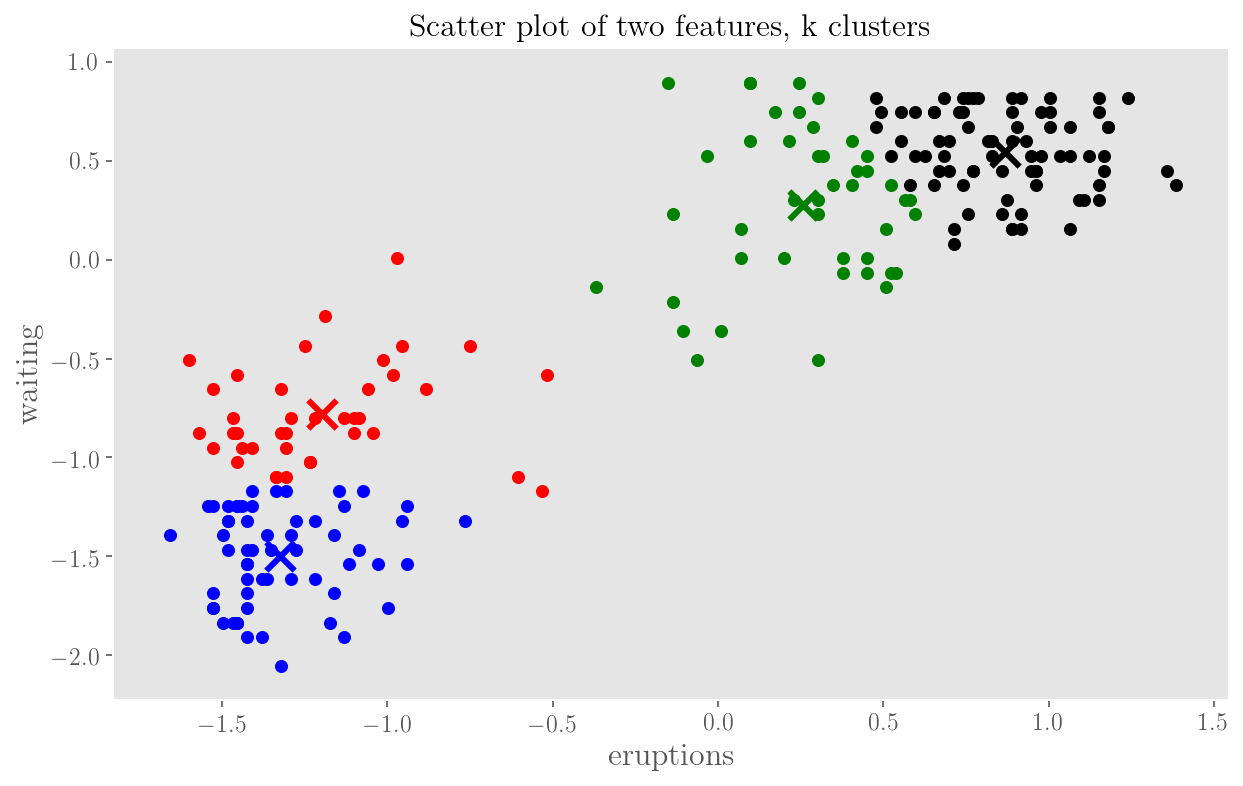

In [15]:
# Choose feature indices from the header
f1 = 1
f2 = 2

k = 4

# List of colours: if len is < k, add some
colours = {
    'red': 'r',
    'black': 'k',
    'blue': 'b',
    'green': 'g',
    'grey': '#929090',
    'pink': '#FFB6C1',
    'light_blue': '#00BFFF',
    'light_green': '#29E191'
}

plt.title('Scatter plot of two features, k clusters', fontweight='bold', fontsize=16)
plt.xlabel('eruptions')
plt.ylabel('waiting')
plt.grid()

# Note: plot displays the scaled data
for cluster_index in range(k):
    cluster_color = colours[list(colours)[cluster_index]]
    cluster_points = retrieve_cluster_points(cluster_index, labels, scaled_data)
    plt.scatter([point[f1-1] for point in cluster_points], 
                [point[f2-1] for point in cluster_points], color=cluster_color)
    plt.scatter(centroids[cluster_index,f1-1], centroids[cluster_index, f2-1], marker='x', s=200, color=cluster_color)

plt.savefig('cluster.png', dpi=200)
plt.show();